In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import GridSearchCV


data = pd.read_csv('..\\Fermi-LAT Data\\fl_numericalonly_nopositional_withclasses.csv',index_col=0)
data = data.dropna()
data = data.reset_index()

print(len(data.columns))

59


We will split the dataset (obtained from sklearn load_digits) into a training and test set using the code below 

In [31]:
from sklearn.model_selection import GridSearchCV

X = data.loc[:, data.columns != 'CLASS1']
Y = data['CLASS1']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=4) 
# test_size set the proportion of data to use as test data. The rest of the data will be used as training data

'''HIGHLY RECOMMENDED TO SCALE TRAINING DATA '''

scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  

hl_list = []
for i in range(1,50):
    hl_list.append((int(i),int(2)))


NN = MLPClassifier(random_state=1, max_iter=1000) # creates the neural network classifier

parameter_space = {
        'hidden_layer_sizes':hl_list,
        'activation':['tanh','relu'],
        'solver':['sgd','adam'],
        'alpha':[0.0001,0.001,0.00001],
        'learning_rate':['constant','invscaling','adaptive']
}

clf = GridSearchCV(NN, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)

# Best paramete set
#print('Best parameters found:\n', clf.best_params_)
'''
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
'''    
#NN.fit(x_train, y_train)

'\n# All results\nmeans = clf.cv_results_[\'mean_test_score\']\nstds = clf.cv_results_[\'std_test_score\']\nfor mean, std, params in zip(means, stds, clf.cv_results_[\'params\']):\n    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))\n'

In [32]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (13, 2), 'learning_rate': 'constant', 'solver': 'sgd'}


In [33]:
NN = MLPClassifier(activation='relu', alpha= 0.0001, hidden_layer_sizes=(13, 2), learning_rate='constant', solver='sgd', random_state=1, max_iter=1000)
NN.fit(x_train, y_train)


MLPClassifier(hidden_layer_sizes=(13, 2), max_iter=1000, random_state=1,
              solver='sgd')

Now testing the model:

In [42]:
y_pred = NN.predict(x_test)
y_proba = NN.predict_proba(x_test)

accuracy = accuracy_score(y_test, y_pred)*100
confusion = confusion_matrix(y_test, y_pred)
print(accuracy)
print(confusion)

91.33574007220217
[[170   7]
 [ 17  83]]


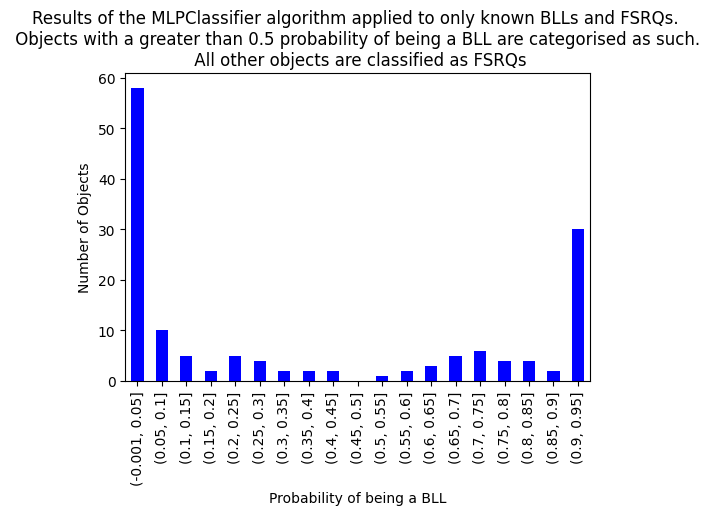

In [68]:
import matplotlib.pyplot as plt

probs = pd.DataFrame(y_proba,columns=('p_1','p_2'))
bin_probs_1 = pd.cut(probs['p_1'],(np.arange(0,1,0.05)),include_lowest=True)
bin_probs_2 = pd.cut(probs['p_2'],(np.arange(0,1,0.05)),include_lowest=True)

fig, ax = plt.subplots()
ax = bin_probs_1.value_counts(sort=False).plot.bar(color="b", figsize=(6,4))
ax.set_xlabel('Probability of being a BLL')
ax.set_ylabel('Number of Objects')
ax.set_title('Results of the MLPClassifier algorithm applied to only known BLLs and FSRQs. \n Objects with a greater than 0.5 probability of being a BLL are categorised as such. \n All other objects are classified as FSRQs')
#ax.bar(bin_probs_1,5)

plt.show()